In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [7]:
img_size=(26,26)
batch_size=32

In [8]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Sagar\Python files_Jupiter\Git Repo Local\IDS_IPS Softmax Classification\Datasets\Final Datasets\Train\Images",
    color_mode='rgb',
    image_size=img_size,
    shuffle=False,
)

Found 18001 files belonging to 9 classes.


In [9]:
test_dataset=tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Sagar\Python files_Jupiter\Git Repo Local\IDS_IPS Softmax Classification\Datasets\Final Datasets\Test\Images",
    color_mode='rgb',
    image_size=img_size,
    shuffle=False,
)

Found 4493 files belonging to 9 classes.


In [10]:
initializers=tf.keras.initializers.RandomNormal(seed=1)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(26,26,3)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=initializers),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(256,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=initializers),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(512,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=initializers),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(9,activation='linear',kernel_initializer=initializers)
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 re_lu_3 (ReLU)              (None, 13, 13, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 256)       147712    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 re_lu_4 (ReLU)              (None, 6, 6, 256)        

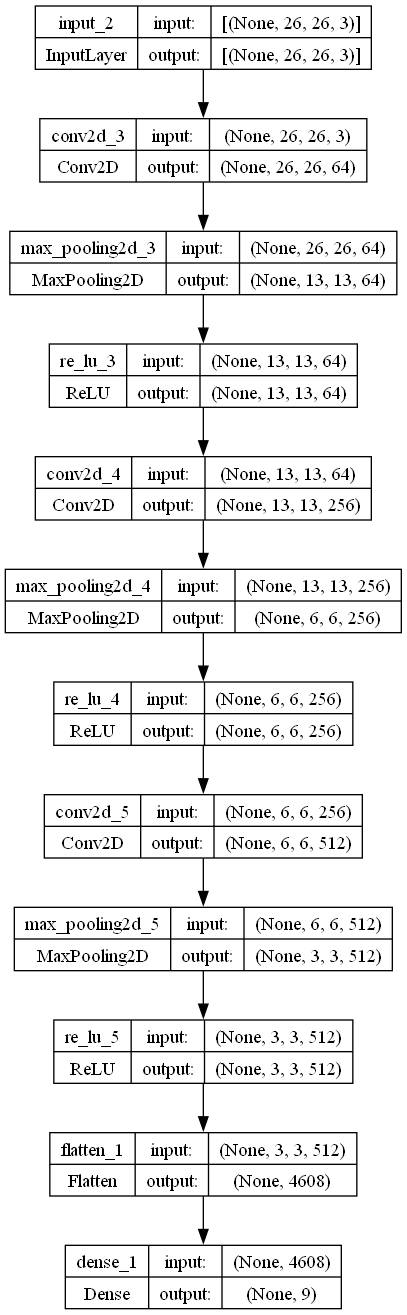

In [12]:
tf.keras.utils.plot_model(model,to_file="Softmax_CNN_model.png",show_shapes=True)

In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.prev_loss=0
    def on_epoch_end(self,epoch,logs={}):
        model.save(f"C:/Users/Sagar/Python files_Jupiter/Git Repo Local/IDS_IPS Softmax Classification/Results/CNN models/model_{epoch}.h5")
        if(epoch>0 and logs.get('loss')>self.prev_loss):
            print('\nLearning rate updated')
            self.model.optimizer.lr.assign(self.model.optimizer.lr.read_value()*0.1)
        self.prev_loss=logs.get('loss')

callbacks=myCallback()

In [8]:
history=model.fit(train_dataset,validation_data=test_dataset,epochs=30,callbacks=[callbacks])

Epoch 1/30


563/563 [==============================] - 16s 19ms/step - loss: 59.9578 - accuracy: 0.9148 - val_loss: 282.3023 - val_accuracy: 0.0227
Epoch 2/30
563/563 [==============================] - 10s 17ms/step - loss: 6.3259 - accuracy: 0.9301 - val_loss: 15.2174 - val_accuracy: 0.2437
Epoch 3/30
563/563 [==============================] - 10s 17ms/step - loss: 0.6082 - accuracy: 0.9616 - val_loss: 15.6133 - val_accuracy: 0.2853
Epoch 4/30
563/563 [==============================] - 10s 17ms/step - loss: 0.2801 - accuracy: 0.9737 - val_loss: 3.3872 - val_accuracy: 0.6323
Epoch 5/30
563/563 [==============================] - 10s 17ms/step - loss: 0.1331 - accuracy: 0.9833 - val_loss: 4.2225 - val_accuracy: 0.6263
Epoch 6/30
563/563 [==============================] - 10s 17ms/step - loss: 0.0640 - accuracy: 0.9901 - val_loss: 3.9192 - val_accuracy: 0.6454
Epoch 7/30
563/563 [==============================] - 10s 17ms/step - loss: 0.0358 - accuracy: 0.9927 - val_loss: 2.4012 - val_accuracy: 0.738

In [13]:
# Emergency Save
model.save(f"C:/Users/Sagar/Python files_Jupiter/Git Repo Local/IDS_IPS Softmax Classification/Results/CNN models/model_{30}.h5")

In [9]:
import json

with open(f"C:/Users/Sagar/Python files_Jupiter/Git Repo Local/IDS_IPS Softmax Classification/Results/CNN.txt","w") as file:
    file.write(json.dumps(history.params))
with open(f"C:/Users/Sagar/Python files_Jupiter/Git Repo Local/IDS_IPS Softmax Classification/Results/CNN_history.txt","w") as file:
    file.write(json.dumps(history.history))

In [14]:
model=tf.keras.models.load_model(f"C:/Users/Sagar/Python files_Jupiter/Git Repo Local/IDS_IPS Softmax Classification/Results/CNN models/model_{29}.h5")

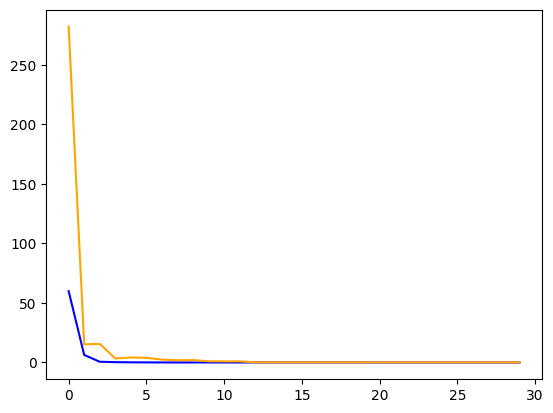

In [10]:
plt.plot(range(30),history.history["loss"],color="blue",label="Train Loss")
plt.plot(range(30),history.history["val_loss"],color="orange",label="Validation Loss")
plt.show()

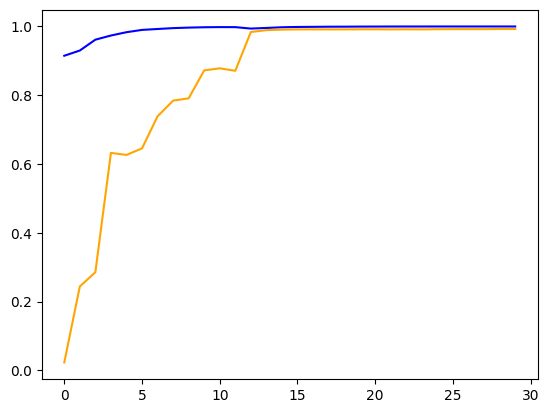

In [11]:
plt.plot(range(30),history.history["accuracy"],color="blue",label="Train Accuracy")
plt.plot(range(30),history.history["val_accuracy"],color="orange",label="Validation Accuracy")
plt.show()

In [15]:
model.evaluate(train_dataset)
model.evaluate(test_dataset)

141/141 [==============================] - 12s 82ms/step - loss: 0.1057 - accuracy: 0.9927


[0.1056579127907753, 0.9926552176475525]

In [16]:
Y_test=np.concatenate([y for x,y in test_dataset],axis=0)

In [17]:
y_predict=np.argmax(tf.nn.softmax(model.predict(test_dataset)),axis=1)

141/141 [==============================] - 10s 72ms/step


In [18]:
confusion_matrix=tf.math.confusion_matrix(Y_test,y_predict)
confusion_matrix

<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[3071,    0,    0,    0,    0,    0,    0,    2,    0],
       [   1,  381,    0,    0,    0,    0,    0,    2,    0],
       [   0,    0,  384,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,   60,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,   45,    0,    0,    0,    0],
       [   5,    0,    0,    0,    0,   29,   10,    0,    0],
       [   1,    0,    0,    0,    0,    0,   40,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0,  383,    0],
       [   9,    0,    0,    0,    0,    0,    2,    0,   67]])>

In [19]:
from mlxtend.plotting import plot_confusion_matrix

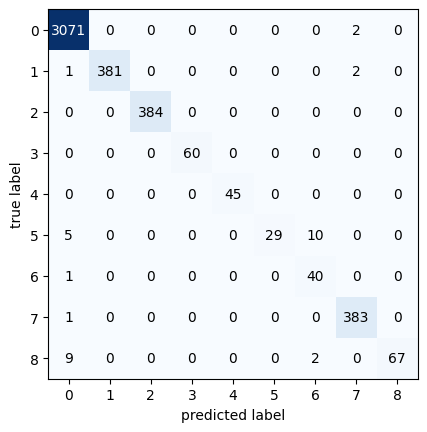

In [20]:
fig,ax=plot_confusion_matrix(confusion_matrix.numpy())
plt.show()